## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [2]:
df = pd.read_csv('traffic_accidents.csv')
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

#### Check for null values

In [4]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


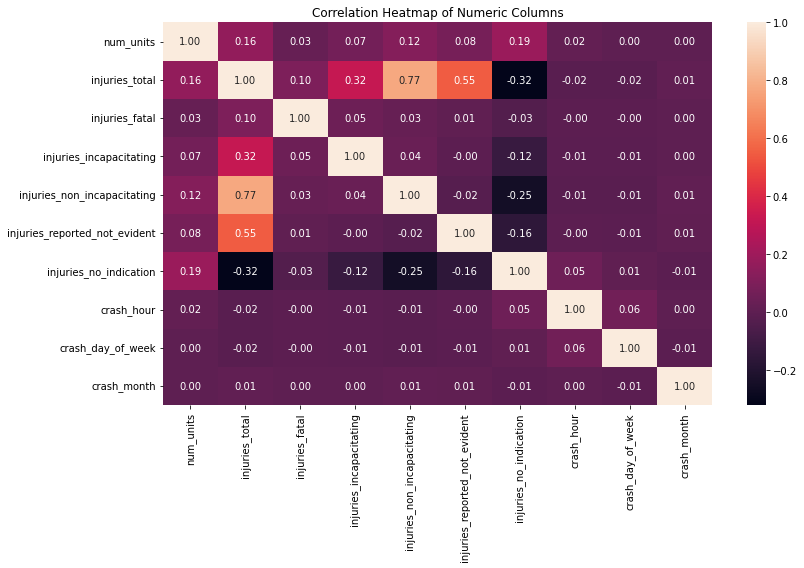

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])


corr = numeric_cols.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

##### There is high correlation between total injuries and injuries that are non incapacitating, this means that most people get into small accidents, without major injury proceed their journey

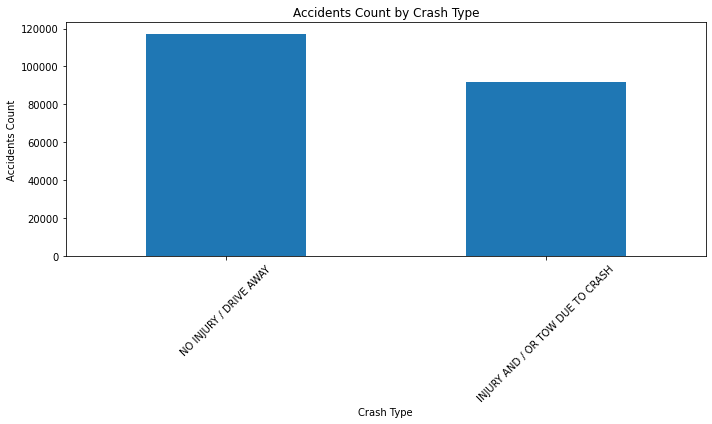

In [19]:
accidents_by_type = df['crash_type'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar')
plt.title('Accidents Count by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Most of the people who get into accidents drive away without major injury.

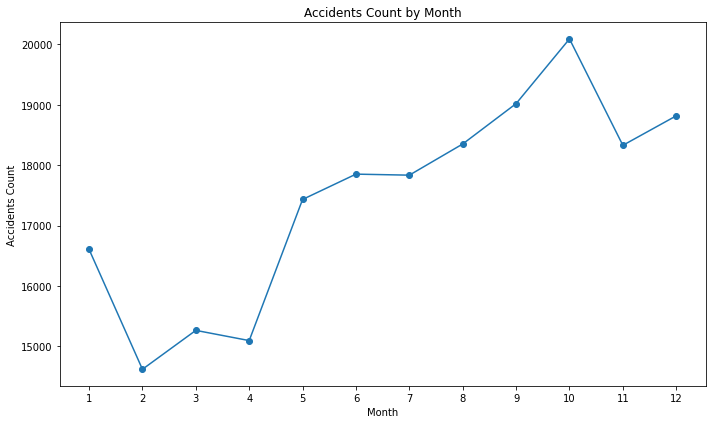

In [22]:
accidents_by_month = df['crash_month'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='line', marker='o')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.ylabel('Accidents Count')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

##### More number of accidents happen during October and February has less number of accidents.

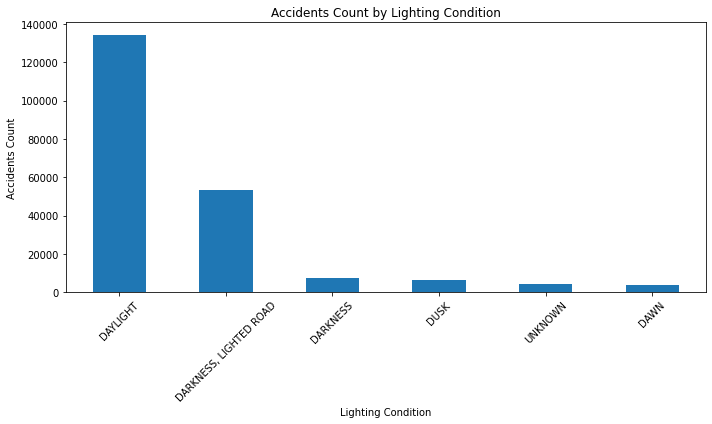

In [23]:
accidents_by_light = df['lighting_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_light.plot(kind='bar')
plt.title('Accidents Count by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Most of the accidents happen in the daylight.

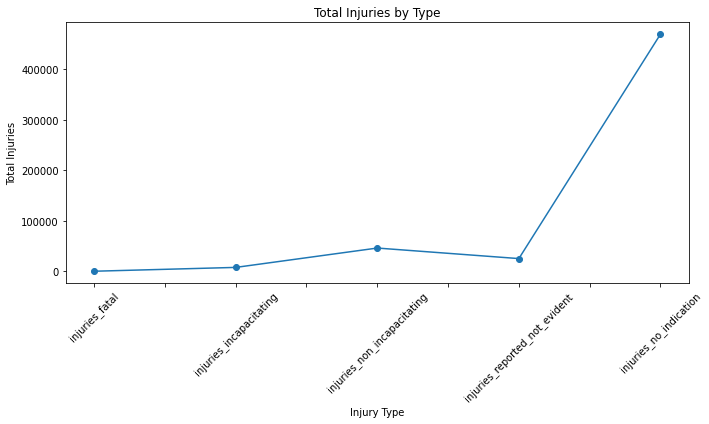

In [18]:
injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 
                'injuries_reported_not_evident', 'injuries_no_indication']
injury_totals = df[injury_types].sum()


plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### In most of the cases there are no indication of injuries.

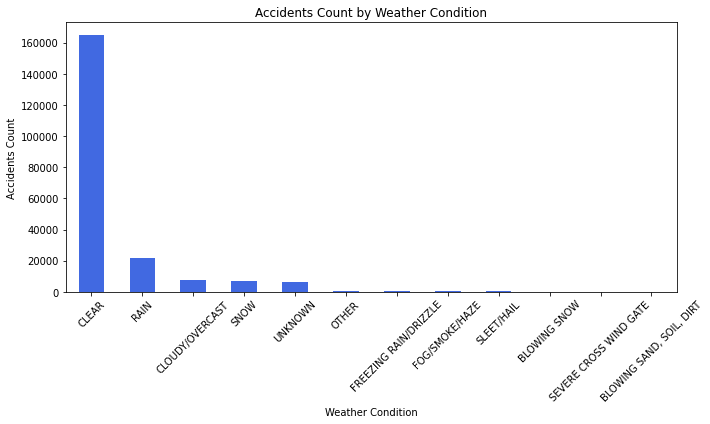

In [11]:
accidents_by_weather = df['weather_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='royalblue')
plt.title('Accidents Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Most accidents occur in clear weather conditions, followed by rain and overcast conditions.

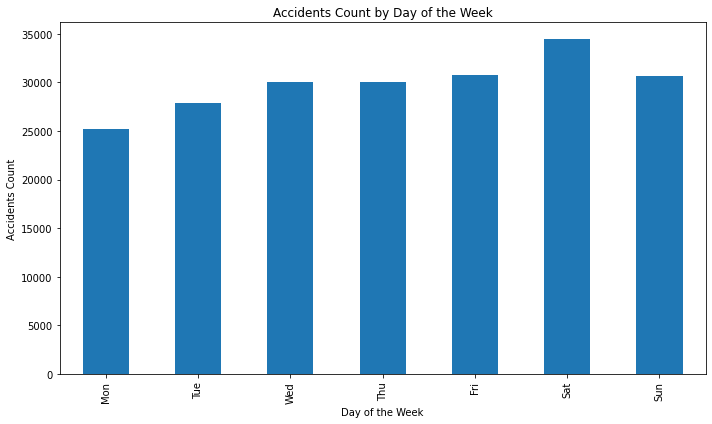

In [11]:
accidents_by_day = df['crash_day_of_week'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_day.plot(kind='bar')
plt.title('Accidents Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accidents Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

##### Almost all days have similiar number of accidents with Saturday being the highest.

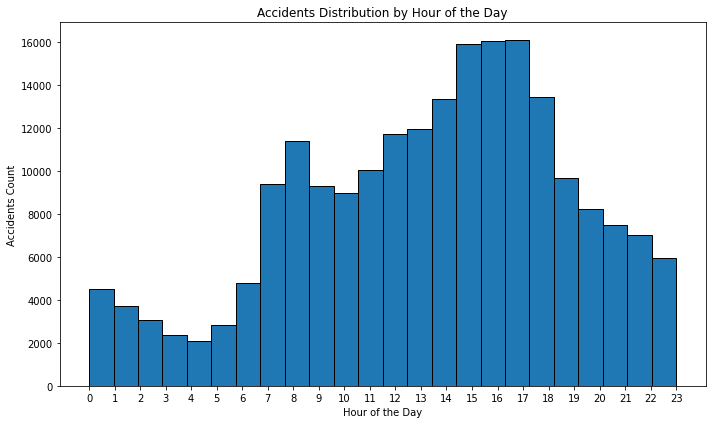

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['crash_hour'], bins=24,  edgecolor='black')
plt.title('Accidents Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

##### Accidents are more likely to occur during the day, with the highest number of accidents occurring between 3:00 PM and 6:00 PM.

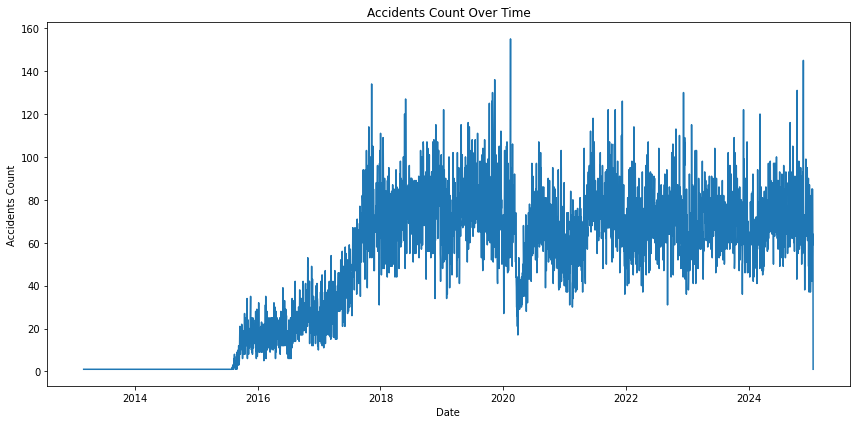

In [16]:
df['crash_date'] = pd.to_datetime(df['crash_date'])


accidents_by_date = df.groupby(df['crash_date'].dt.date).size()


plt.figure(figsize=(12,6))
accidents_by_date.plot(kind='line')
plt.title('Accidents Count Over Time')
plt.xlabel('Date')
plt.ylabel('Accidents Count')
plt.tight_layout()
plt.show()

##### Eventhough years pass by the number of accidents nearly remain the same.